In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\Documents\\diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

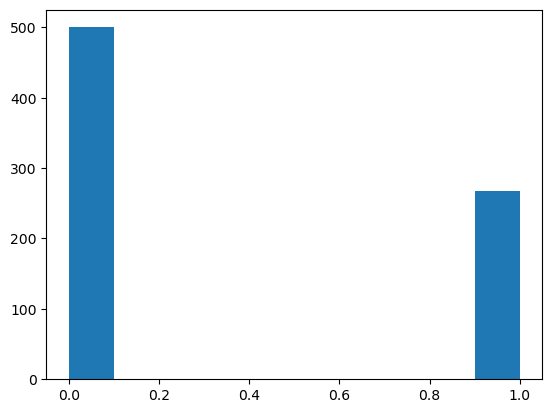

In [6]:
plt.hist(df["Outcome"])
plt.show()

In [7]:
x=df.drop(['Outcome'],axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
print("xtrain:", xtrain.shape)
print("xtest:", xtest.shape)
print("ytrain:", ytrain.shape)
print("ytest:", ytest.shape)

xtrain: (614, 8)
xtest: (154, 8)
ytrain: (614,)
ytest: (154,)


In [16]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
x_train=scaling_x.fit_transform(xtrain)
x_test=scaling_x.fit_transform(xtest)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
Accuracy=classification_report(ytest,y_pred)
print(Accuracy)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       107
           1       0.64      0.68      0.66        47

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154



In [18]:
train_accuracy=model.score(xtrain,ytrain)
print("Accuracy of the model on train data=",train_accuracy)
test_accuracy=model.score(xtest,ytest)
print("Accuracy of the model on test data=",test_accuracy)

Accuracy of the model on train data= 1.0
Accuracy of the model on test data= 0.7857142857142857


In [23]:
model1=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
model1.fit(xtrain,ytrain)
print("train_accuracy=",model1.score(xtrain,ytrain))
print("test_accuracy=",model1.score(xtest,ytest))

train_accuracy= 0.7980456026058632
test_accuracy= 0.7792207792207793


In [24]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report,f1_score
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
Accuracy=classification_report(ytest,y_pred)
print(Accuracy)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



In [25]:
train_accuracy=model.score(xtrain,ytrain)
print("Accuracy of the model on train data=",train_accuracy)
test_accuracy=model.score(xtest,ytest)
print("Accuracy of the model on test data=",test_accuracy)

Accuracy of the model on train data= 1.0
Accuracy of the model on test data= 0.8116883116883117


In [26]:
model1=RandomForestClassifier(min_samples_split=10,min_impurity_decrease=0.005)
model1.fit(xtrain,ytrain)
print("train_accuracy=",model1.score(xtrain,ytrain))
print("test_accuracy=",model1.score(xtest,ytest))

train_accuracy= 0.8110749185667753
test_accuracy= 0.8246753246753247


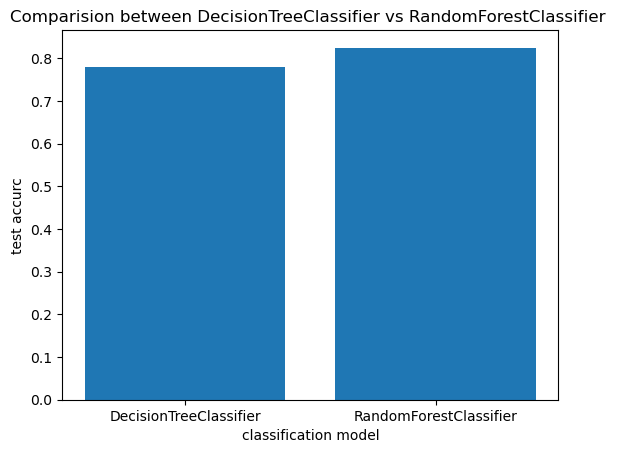

In [33]:
DecisionTreeClassifier_score=0.7792207792207793
RandomForestClassifier_score=0.8246753246753247
Accurcy_score=[DecisionTreeClassifier_score,RandomForestClassifier_score]
model_names=['DecisionTreeClassifier','RandomForestClassifier']
plt.bar(model_names,Accurcy_score)
plt.xlabel("classification model")
plt.ylabel("test accurc")
plt.title("Comparision between DecisionTreeClassifier vs RandomForestClassifier ")
plt.show()

In [22]:
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics import classification_report,f1_score
model=MLPClassifier()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
Accuracy=classification_report(ytest,y_pred)
print(Accuracy)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       107
           1       0.48      0.26      0.33        47

    accuracy                           0.69       154
   macro avg       0.60      0.57      0.56       154
weighted avg       0.65      0.69      0.66       154



In [27]:
train_accuracy=model.score(xtrain,ytrain)
print("Accuracy of the model on train data=",train_accuracy)
test_accuracy=model.score(xtest,ytest)
print("Accuracy of the model on test data=",test_accuracy)

Accuracy of the model on train data= 1.0
Accuracy of the model on test data= 0.8116883116883117


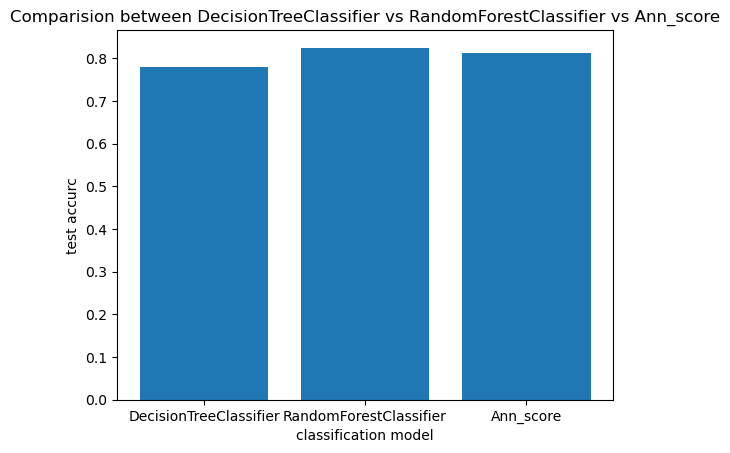

In [35]:
DecisionTreeClassifier_score=0.7792207792207793
RandomForestClassifier_score=0.8246753246753247
Ann_score= 0.8116883116883117
Accurcy_score=[DecisionTreeClassifier_score,RandomForestClassifier_score,Ann_score]
model_names=['DecisionTreeClassifier',   'RandomForestClassifier',  'Ann_score']
plt.bar(model_names,Accurcy_score)
plt.xlabel("classification model")
plt.ylabel("test accurc")
plt.title("Comparision between DecisionTreeClassifier vs RandomForestClassifier vs Ann_score")
plt.show()